# Consommation d'électricité en France
https://www.rte-france.com/eco2mix/telecharger-les-indicateurs

In [258]:
def read_rte(year):
    '''
    reading of  an excel RTE file downloaded from https://www.rte-france.com/eco2mix/telecharger-les-indicateurs
    Unzip the file and remame then yyy.xlsx where yyyy stands for the year
    
    Arguments:
        year (int) : year of the RTE excel file to be read
    Returns:
        B (dataframe): datafame of the RTE file
    '''

    import pandas as pd
    import os

    file = str(year) + '.xlsx'

    directory = r"C:\Expert senior\SHIFT\Electricite"
    path = os.path.join(directory, file)

    A = pd.read_excel(path,
                      skipfooter=1,                                  # skip the last line which is a comment
                      parse_dates=[['Date', 'Heures']],              # concanenate columns Date and Heures as TimeStamp
                      usecols='c:E,H:Q')                             # select columns
    A.drop([i for i in list(A.index)[1::2]],inplace=True)            # drop irrelevent rows
    index_ = [x for i,x in enumerate(A['Date_Heures']) if i%2 == 0 ] # resample every hour and convert in energy
    A.drop(columns=['Date_Heures'], inplace=True)
    B = A.groupby(A.index//4).mean()
    B['Date_Heures'] = index_
    B.set_index('Date_Heures',inplace=True)
    return B

year = 2018
B = read_rte(year)
B.describe()

,Consommation,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,54283.219521,234.531164,656.297146,3446.567352,44861.127055,3211.287557,1208.082477,7695.196404,-844.762500,1089.724030,-7274.784247
std,12205.581788,248.476385,606.704413,2453.710730,6397.554538,2488.497547,1733.565652,3046.293434,1051.497249,65.762827,3944.395273
min,30778.000000,56.000000,-45.500000,244.500000,29037.000000,83.500000,-2.000000,1517.000000,-3629.500000,898.000000,-16389.000000
25%,44959.875000,84.000000,16.000000,1195.000000,40428.875000,1337.000000,-1.000000,5187.000000,-1655.875000,1042.000000,-10193.375000
50%,52481.000000,100.500000,542.000000,3028.000000,43587.000000,2488.500000,35.250000,7857.750000,-196.500000,1092.000000,-7597.250000
75%,63075.750000,472.000000,1050.625000,4857.000000,49892.000000,4383.000000,2141.625000,9895.375000,-25.500000,1132.000000,-4810.875000
max,96129.500000,2502.500000,2926.000000,9659.000000,58631.000000,12245.000000,6376.500000,17140.500000,-4.000000,1283.500000,9257.000000


## Statistique, pour une année, relative à la production et à la consommation d'électricité en France

Consommation et production d'énergie électrique pour l'année 2018

Consommation : 475.521003 TWh 
Fioul : 2.054493 TWh 
Charbon : 5.749163 TWh 
Gaz : 30.19193 TWh 
Nucléaire : 392.983473 TWh 
Eolien : 28.130879 TWh 
Solaire : 10.5828025 TWh 
Hydraulique : 67.4099205 TWh 
Bioénergies : 9.5459825 TWh 
En 2018 la consommation maximale, en une heure, est de 96.1295 TWh. Elle est advenue le 2018/2/28 à 19h
En 2018 la consommation minimale, en une heure, est de 30.778 TWh. Elle est advenue le 2018/8/12 à 7h


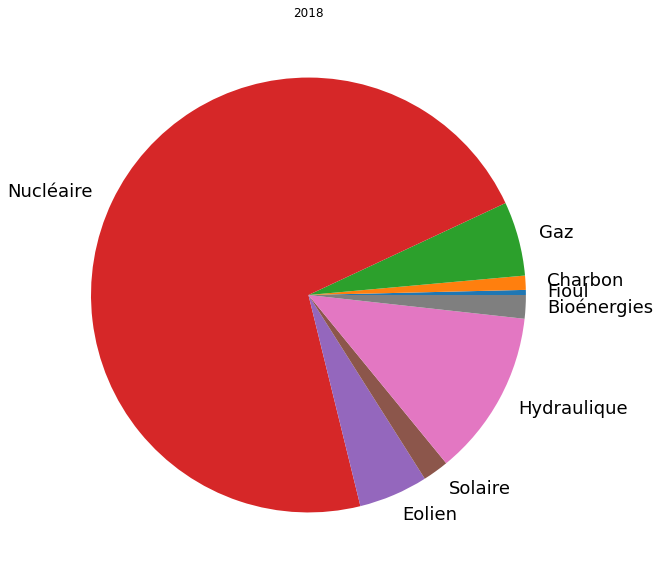

In [306]:
def stat_prod_electricite(year):
    
    format_date = lambda x : f'{x.year}/{x.month}/{x.day} à {x.hour}h'
    B = read_rte(year)
    fig=plt.figure(figsize=(10,10))
    B[["Fioul","Charbon","Gaz","Nucléaire","Eolien","Solaire","Hydraulique","Bioénergies"]] .sum().plot(kind='pie',fontsize=18)
    plt.ylabel("")
    plt.title(f"{year}")
    
    cat = ["Consommation","Fioul","Charbon","Gaz","Nucléaire","Eolien","Solaire","Hydraulique","Bioénergies"]
    print(f"Consommation et production d'énergie électrique pour l'année {year}\n")
    for x in [(x[0],x[1]) for x in zip(cat,B[cat] .sum())]:
        print(f'{x[0]} : {x[1]/1.e6} TWh ')
    
    tup = [(x[0],x[1]) for x in zip(B.index,B['Consommation'])]
    tup = sorted(tup, key=lambda x: x[1], reverse = True)
    print(f'En {year} la consommation maximale, en une heure, est de {tup[0][1]/1.e3 } TWh. Elle est advenue le {format_date(tup[0][0]) }')
    print(f'En {year} la consommation minimale, en une heure, est de {tup[-1][1]/1.e3 } TWh. Elle est advenue le {format_date(tup[-1][0]) }')
    return

year = 2018
stat_prod_electricite(year)

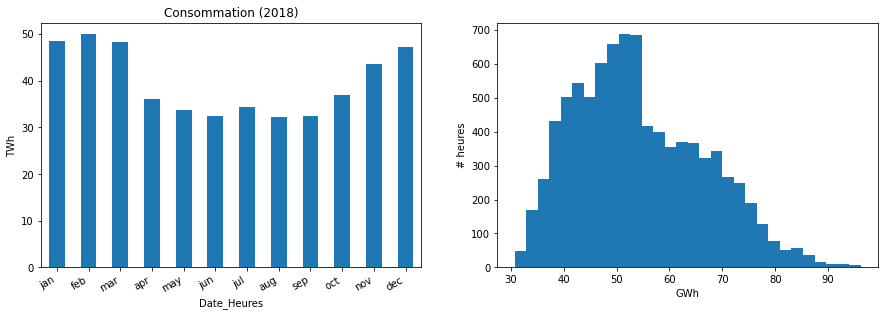

In [309]:
def stat_prod_consommation(year):

    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    %matplotlib inline
    cat = 'Consommation'
    B = read_rte(year)
    BN = B[cat].resample('M').sum()/1.e6

    fig=plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    ax = BN.plot(kind='bar')
    #ticklabels = [item.strftime('%m') for item in B.index]
    ticklabels = range(1,13)
    ticklabels = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
    plt.gcf().autofmt_xdate()
    plt.ylabel("TWh")
    plt.title(f'{cat} ({year})')

    plt.subplot(1,2,2)
    plt.hist(B['Consommation']/1.e3,bins=30)
    plt.xlabel("GWh")
    plt.ylabel("# heures")
    return

year =2018
stat_prod_consommation(year)

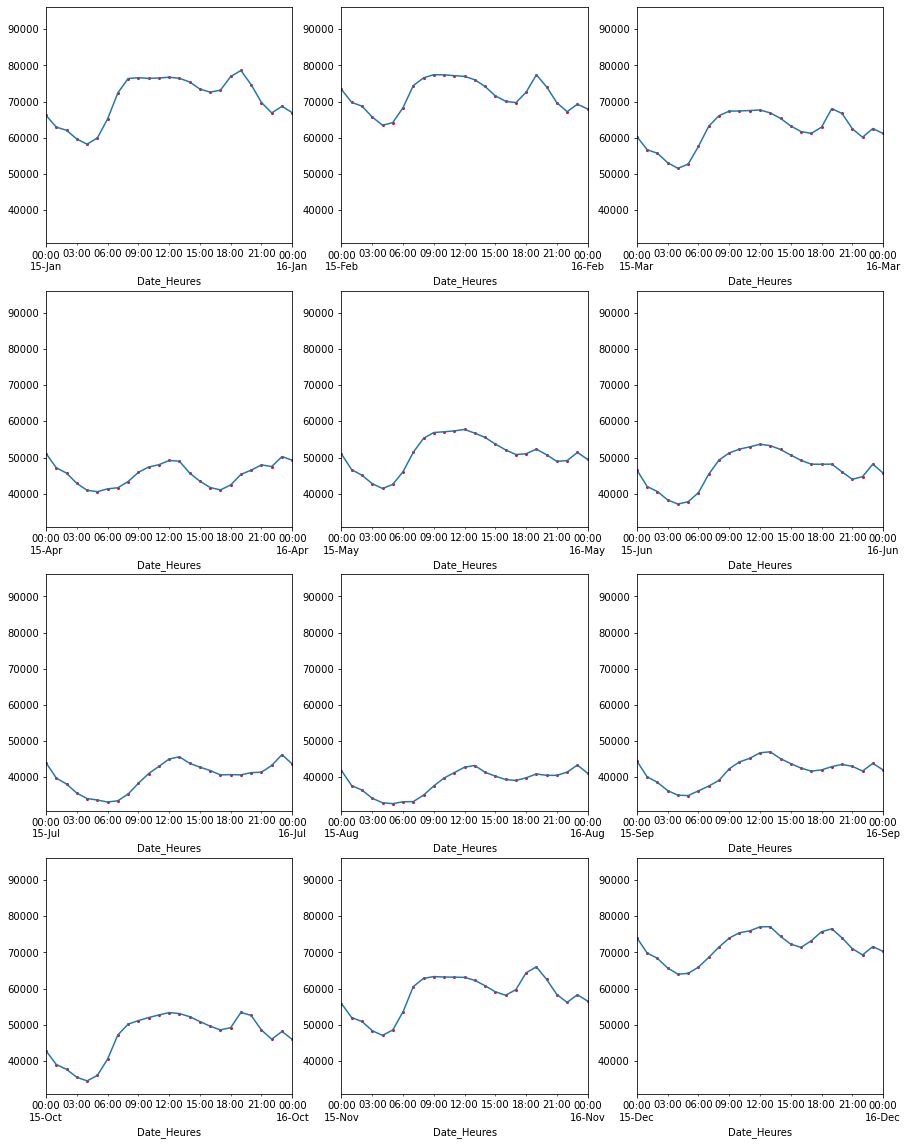

In [317]:
import matplotlib.pyplot as plt
%matplotlib inline
day = 15
fig=plt.figure(figsize=(15,20))

for i, month in enumerate(range(1,13)):
    
    plt.subplot(4,3,i+1)
    dep = str(year) + '-' + str(month) + '-' + str(day) + ' 00:00'
    end = str(year) + '-' + str(month) + '-' + str(day+1) + ' 00:00'
    B[dep:end]['Consommation'].plot(style='or',ms=2)
    B[dep:end]['Consommation'].plot()
    plt.ylim([min(B['Consommation']),max(B['Consommation'])])

## Evolution au cours d'une jounée de la production d'électricité par éolienne

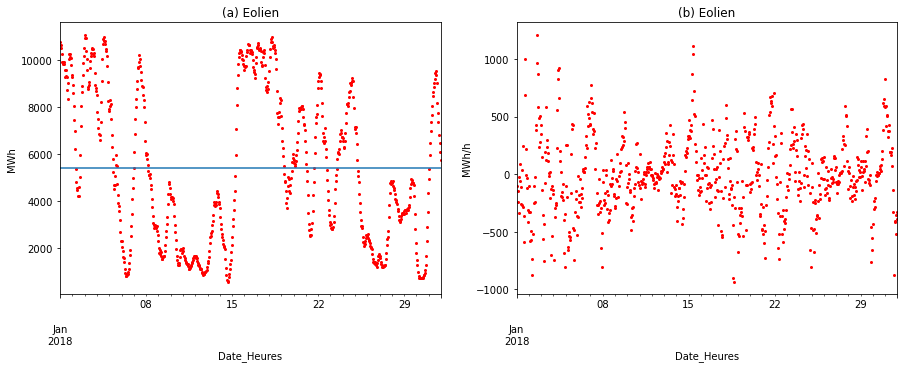

In [316]:
def prod_eolien_evolution_par_jour(year,month):
    '''
    Draw electricity production vs time
    cat must be equal to : 'Fioul', 'Charbon', 'Gaz', 'Nucléaire', 'Eolien',
           'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies'

    '''
    import matplotlib.pyplot as plt
    %matplotlib inline
    cat ='Eolien'
    B = read_rte(year)
    
    def numberOfDays(y, m):
      leap = 0
      if y% 400 == 0:
         leap = 1
      elif y % 100 == 0:
         leap = 0
      elif y% 4 == 0:
         leap = 1
      if m==2:
         return 28 + leap
      list = [1,3,5,7,8,10,12]
      if m in list:
         return 31
      return 30


    fig=plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    dep = str(year)+'-' + str(month) +'-01'
    fin = str(year)+'-' + str(month) +'-'+ str(numberOfDays(year, month))
    B[dep:fin][cat].plot(style='or',ms=2)
    B['mean'] = B[dep:fin][cat].mean()
    B[dep:fin]['mean'].plot()
    plt.ylabel("MWh")
    plt.title(f'(a) {cat}')

    plt.subplot(1,2,2)
    B[dep:fin][cat].diff().plot(style='or',ms=2)
    plt.ylabel("MWh/h")
    plt.title(f'(b) {cat}')

year =2018
month = 1
prod_eolien_evolution_par_jour(year,month)

Text(0.5, 1.0, 'Eolien')

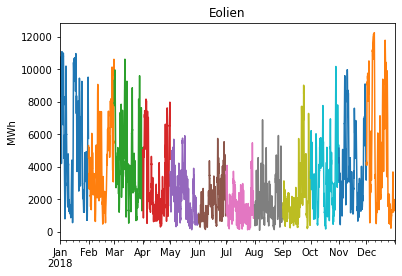

In [137]:
B[cat].resample('M').plot()
plt.ylabel("MWh")
plt.title(cat)

Text(0.5, 1.0, '2018')

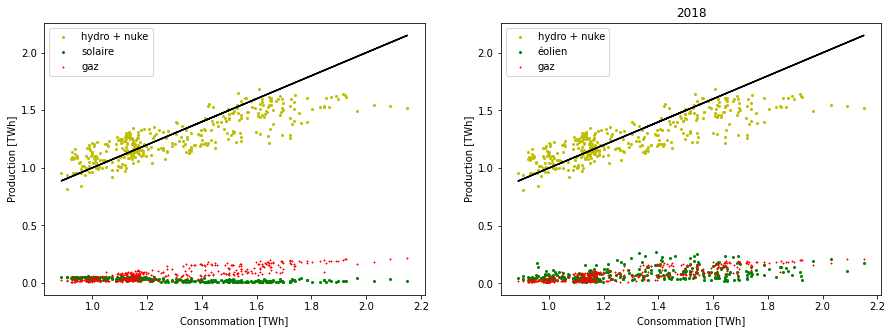

In [248]:
eolien = B['Eolien'] .resample('D').agg(['mean','std','min','max','sum'])
solaire = B['Solaire'] .resample('D').agg(['mean','std','min','max','sum'])
gaz = B['Gaz'] .resample('D').agg(['mean','std','min','max','sum'])
consommation = B['Consommation'] .resample('D').agg(['mean','std','min','max','sum'])
nucleaire = B['Nucléaire'] .resample('D').agg(['mean','std','min','max','sum'])
B['hydro_nuke'] = B['Hydraulique'] + B['Nucléaire']
hydro_nuke = B['hydro_nuke'] .resample('D').agg(['mean','std','min','max','sum'])

fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(consommation['sum']/1.e6, hydro_nuke['sum']/1.e6,'oy',markersize=2,label='hydro + nuke' )
plt.plot(consommation['sum']/1.e6, solaire['sum']/1.e6,'og',markersize=2,label='solaire' )
plt.plot(consommation['sum']/1.e6, gaz['sum']/1.e6,'+r',markersize=2,label='gaz' )
plt.plot(consommation['sum']/1.e6,consommation['sum']/1.e6,'-k')
plt.xlabel('Consommation [TWh]')
plt.ylabel('Production [TWh]')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(consommation['sum']/1.e6, hydro_nuke['sum']/1.e6,'oy',markersize=2,label='hydro + nuke' )
plt.plot(consommation['sum']/1.e6, eolien['sum']/1.e6,'og',markersize=2,label='éolien' )
plt.plot(consommation['sum']/1.e6, gaz['sum']/1.e6,'+r',markersize=2,label='gaz' )

plt.plot(consommation['sum']/1.e6,consommation['sum']/1.e6,'-k')
plt.xlabel('Consommation [TWh]')
plt.ylabel('Production [TWh]')
plt.legend(loc=0)
plt.title(str(year))

In [144]:
print(sum(list(B[cat][0:24*31])))
B[cat].resample('M').sum()

4004354.5


Date_Heures
2018-01-31    4004354.5
2018-02-28    2779862.0
2018-03-31    3129250.0
2018-04-30    2163613.0
2018-05-31    1602348.0
2018-06-30    1371747.5
2018-07-31    1102101.5
2018-08-31    1405170.0
2018-09-30    1613576.5
2018-10-31    2491207.0
2018-11-30    2806606.0
2018-12-31    3661043.0
Freq: M, Name: Eolien, dtype: float64

Text(0.5, 1.0, 'Eolien (2018)')

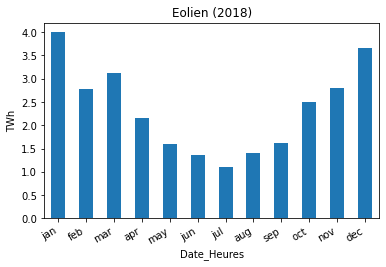

In [152]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
BN = B[cat].resample('M').sum()/1.e6
ax = BN.plot(kind='bar')
#ticklabels = [item.strftime('%m') for item in B.index]
ticklabels = range(1,13)
ticklabels = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.ylabel("TWh")
plt.title(f'{cat} ({year})')

Text(0.5, 1.0, 'Eolien ')

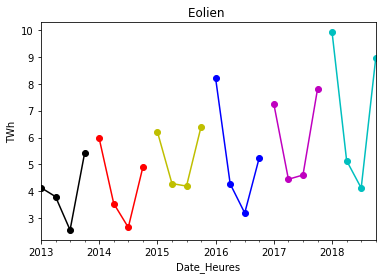

In [166]:
cat = 'Eolien'
years = [2013,2014,2015,2016,2017,2018]
color = {2013:'ok',2014:'or',2015:'oy',2016:'ob',2017:'om',2018:'oc'}
for year in years:
    B = read_rte(year)
    BN = B[cat].resample('Q').sum()/1.e6
    BN.plot(style=color[year] )
    BN.plot(style=color[year][-1] )
plt.ylabel("TWh")
plt.title(f'{cat} ')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
N1 = 0
N2 = 3000
plt.plot(B.index[N1:N2] ,B['Solaire'][N1:N2],'or',markersize=0.5)
plt.plot(B.index[N1:N2] ,B['Eolien'][N1:N2],'+b',markersize=0.5)
plt.plot(B.index[N1:N2] ,B['Nucléaire'][N1:N2],'-g',markersize=0.5)
ticklabels = [item.strftime('%M') for item in B.index]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

In [ ]:
plt.plot(B['Consommation'][N1:N2],'or',markersize=0.5)
ticklabels = [item.strftime('%m') for item in B.index]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

1.2090369972517592 2446.7174635276315 0.6130630144904716


,Consommation,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,hydro_nuke
Consommation,1.000000,0.549391,0.478249,0.807045,0.782983,0.252817,-0.028584,0.503237,0.305829,0.315831,0.276359,0.847078
Fioul,0.549391,1.000000,0.452860,0.659772,0.343350,-0.178124,-0.042181,0.357063,0.277594,0.130130,0.300858,0.414576
Charbon,0.478249,0.452860,1.000000,0.496597,0.230744,-0.053962,-0.087511,0.209008,0.111272,0.141479,0.441879,0.268826
Gaz,0.807045,0.659772,0.496597,1.000000,0.593558,-0.002564,-0.152825,0.369649,0.306867,0.258140,0.298703,0.638403
Nucléaire,0.782983,0.343350,0.230744,0.593558,1.000000,0.163445,-0.200161,0.230390,0.110947,0.403504,-0.195413,0.951497
Eolien,0.252817,-0.178124,-0.053962,-0.002564,0.163445,1.000000,-0.175192,0.047479,-0.224490,0.195916,-0.202915,0.158623
Solaire,-0.028584,-0.042181,-0.087511,-0.152825,-0.200161,-0.175192,1.000000,-0.086724,0.124209,-0.255522,0.052460,-0.203292
Hydraulique,0.503237,0.357063,0.209008,0.369649,0.230390,0.047479,-0.086724,1.000000,0.438461,0.071780,0.002043,0.518598
Pompage,0.305829,0.277594,0.111272,0.306867,0.110947,-0.224490,0.124209,0.438461,1.000000,-0.183482,0.056107,0.236110
Bioénergies,0.315831,0.130130,0.141479,0.258140,0.403504,0.195916,-0.255522,0.071780,-0.183482,1.000000,-0.053630,0.377235


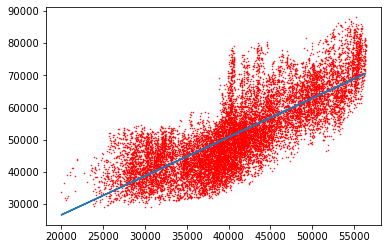

In [8]:
from scipy import stats
from sklearn.metrics import r2_score
import numpy as np

x = B['Nucléaire'] #A['Solaire']
y = B['Consommation']#A['Eolien']  
plt.plot(x,y ,'or',markersize=0.5)

a, b, r_value, p_value, std_err = stats.linregress(x, y)
R=r2_score(y,a*np.array(x)+b)
plt.plot(x,a*np.array(x)+b )
print(a,b,R)
B.corr(method='pearson')

Text(0, 0.5, 'Puissance éolieenne installée  [GW]')

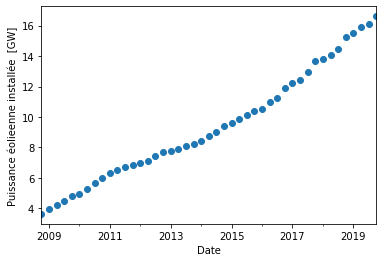

In [249]:
def read_parc_eolien():
    '''
    reading of  an excel RTE file downloaded from:
    https://www.statistiques.developpement-durable.gouv.fr/publicationweb/262
    
    Arguments:
        
    Returns:
        B (dataframe): datafame of the RTE file
    '''

    import pandas as pd
    import os

    file = 'Évolution du parc éolien.csv'

    directory = r"C:\Expert senior\SHIFT\Electricite"
    path = os.path.join(directory, file)

    A = pd.read_csv(path, sep=';', parse_dates=['Date'],usecols=['Date','Terrestre'])
    A.set_index('Date',inplace=True) 
    A = A.dropna()
    A['Terrestre'] = A['Terrestre']/1000
    
    return A

B_eol = read_parc_eolien()
B_eol["Terrestre"] .plot(style='o')
plt.ylabel('Puissance éolieenne installée  [GW]')

Text(0.5, 1.0, 'Energie maximale du parc éolien français')

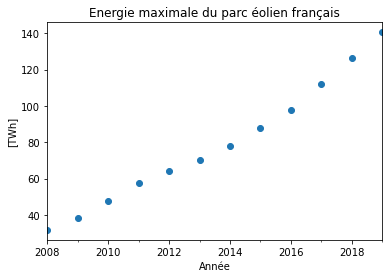

In [257]:
BB = B_eol['Terrestre'].resample('Y').mean()*8760/1000
ax=BB.plot(style='o')
plt.ylabel("[TWh]")
plt.xlabel("Année")
plt.title("Energie maximale du parc éolien français")


In [252]:
list(BB[5:-1])

[70.03182000000001,
 77.88954000000001,
 87.58686,
 97.80102000000001,
 112.26597,
 126.11772]

## Energie éolinne produite

In [120]:
eolien_prod = []
for  year in range(2013,2019):
    C = read_rte(year)
    eolien_prod.append(C['Eolien'].sum()/1.e6)


2013 [15.9123385]
2014 [15.9123385, 17.0589745]
2015 [15.9123385, 17.0589745, 21.094268]
2016 [15.9123385, 17.0589745, 21.094268, 20.9178925]
2017 [15.9123385, 17.0589745, 21.094268, 20.9178925, 24.097575]
2018 [15.9123385, 17.0589745, 21.094268, 20.9178925, 24.097575, 28.130879]


Text(0.5, 1.0, 'Energie éolienne produite en France')

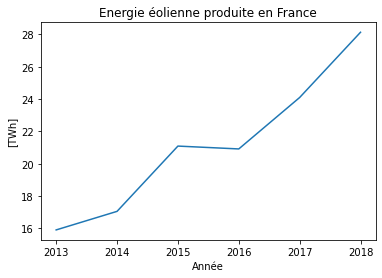

In [256]:
plt.plot(range(2013,2019), eolien_prod)
plt.ylabel("[TWh]")
plt.xlabel("Année")
plt.title("Energie éolienne produite en France")

In [231]:
# facteur de charge de l'éolin
[100*i / j for i, j in zip(eolien_prod,list(BB[5:-1])) ]

[22.721583560158795,
 21.901496016024744,
 24.08382718595004,
 21.388215071785552,
 21.464719006124472,
 22.30525496337866]

In [183]:
1.3*0.78/(0.22*0.003)

1536.3636363636365

In [158]:
import requests
from bs4 import BeautifulSoup


url = "https://fr.wikipedia.org/wiki/Liste_des_parcs_%C3%A9oliens_en_France"
response = requests.get(url)
df = pd.read_html(response.content)[1]

In [159]:
df

,Nom,Site / Ville,Département,Région,Localisation,Démarrage,Arrêt,Turbines,Capacité (MW),Superficie (ha),Production (GW·h/an),Unnamed: 11
0,L'Aisne,Campénéac,Morbihan,Bretagne,"47°57'09.3""N 2°20'31.3""W",2010,NaN,6,2 * 6,NaN,NaN,NaN
1,Aire de Baie de Somme,Sailly-Flibeaucourt,Somme,Hauts-de-France,"50° 10′ N, 1° 45′ E",juillet 1998,NaN,1,025,NaN,NaN,NaN
2,Alizeo,Rivesaltes,Pyrénées-Orientales,Occitanie,"42° 47′ 53″ N, 2° 53′ 21″ E",2010,NaN,1,1,NaN,NaN,NaN
3,Ally,"Ally, Mercœur",Haute-Loire,Auvergne-Rhône-Alpes,"45° 10′ N, 3° 17′ E",décembre 2005,NaN,NaN,NaN,NaN,NaN,NaN
4,Ambon,Ambon,Morbihan,Bretagne,"47° 34′ 50″ N, 2° 32′ 23″ O",avril 2008,NaN,6,1002,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
358,Pougny,Pougny,Nièvre,Bourgogne-Franche-Comté,"47° 23′ 48″ N, 3° 02′ 19″ E",(en construction),NaN,NaN,25,NaN,NaN,NaN
359,Saint-Clément[18],Saint-Clément,Ardèche,Auvergne-Rhône-Alpes,"49° 25′ N, 1° 37′ O",2009,NaN,NaN,NaN,NaN,NaN,NaN
360,Saint-Jacques-de-Néhou[19],Saint-Jacques-de-Néhou,Manche,Normandie,"49° 25′ 47″ N, 1° 37′ 19″ O",2005,NaN,5,NaN,NaN,NaN,NaN
361,Seine-Rive-Gauche-Sud[20],"Payns, Le Pavillon Sainte Julie, Savières",Aube,Grand Est,"48° 22′ 50″ N, 3° 46′ 52″ E",septembre 2012,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
# puissance parc nucléaire français
32*0.9 + 20*1.3 + 4*1.45

60.599999999999994

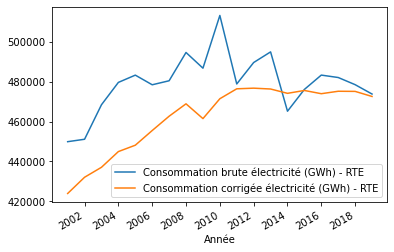

In [241]:
#https://opendata.reseaux-energies.fr/explore/dataset/consommation-annuelle-brute/export/?sort=-annee
file = 'consommation-annuelle-brute.xlsx'

directory = r"C:\Expert senior\SHIFT\Electricite"
path = os.path.join(directory, file)

A = pd.read_excel(path,parse_dates=['Année'])
A.set_index('Année',inplace=True)
A.plot()

    